In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#IMPORTS
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
location = 'nw2'
turbine = 'c02'
mode = 'SS2'

In [13]:
# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
data_folder = os.path.join(package_folder, 'data')
selected_data_little = pd.read_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_selected_data_little.csv'))
selected_data_large = pd.read_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_selected_data_large.csv'))

smart_tracked_small_training = pd.read_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_smart_tracked_modes_small_training.csv'))
smart_tracked_large_training = pd.read_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_smart_tracked_modes_large_training.csv'))
smart_tracked_small_training.set_index('timestamp', inplace=True)
smart_tracked_large_training.set_index('timestamp', inplace=True)
smart_tracked_large_training.index = pd.to_datetime(smart_tracked_large_training.index)
smart_tracked_small_training.index = pd.to_datetime(smart_tracked_small_training.index)

predictions_df_small_training = pd.read_csv(os.path.join(data_folder, 'processed', location, turbine+'_'+mode+'_mode_prediction_small_training.csv'))
predictions_df_large_training = pd.read_csv(os.path.join(data_folder, 'processed', location, turbine+'_'+mode+'_mode_prediction_large_training.csv'))
predictions_df_small_training.set_index('timestamp', inplace=True)
predictions_df_large_training.set_index('timestamp', inplace=True)
predictions_df_large_training.index = pd.to_datetime(predictions_df_large_training.index)
predictions_df_small_training.index = pd.to_datetime(predictions_df_small_training.index)

In [14]:
predictions_df_large_training

,prediction,spread,virtual_ensemble_mean,knowledge_uncertainty,data_uncertainty,residual
timestamp,,,,,,
2023-01-01 00:00:00+00:00,1.028394,0.000003,1.027630,1.800891e-07,0.000002,-0.002835
2023-01-01 00:10:00+00:00,1.030524,0.000002,1.029510,2.598539e-07,0.000004,0.000586
2023-01-01 00:20:00+00:00,1.032770,0.000018,1.032881,3.932435e-08,0.000017,0.001781
2023-01-01 00:30:00+00:00,1.035109,0.000013,1.035320,2.634037e-08,0.000015,-0.004330
2023-01-01 00:40:00+00:00,1.035994,0.000006,1.036264,3.349582e-08,0.000007,0.000041
...,...,...,...,...,...,...
2023-05-31 23:20:00+00:00,1.027236,0.000030,1.029699,4.070574e-06,0.000027,0.027193
2023-05-31 23:30:00+00:00,1.025284,0.000018,1.027965,4.707075e-06,0.000020,0.017518
2023-05-31 23:40:00+00:00,1.031509,0.000017,1.032690,9.444945e-07,0.000021,0.019219


<Axes: xlabel='timestamp'>

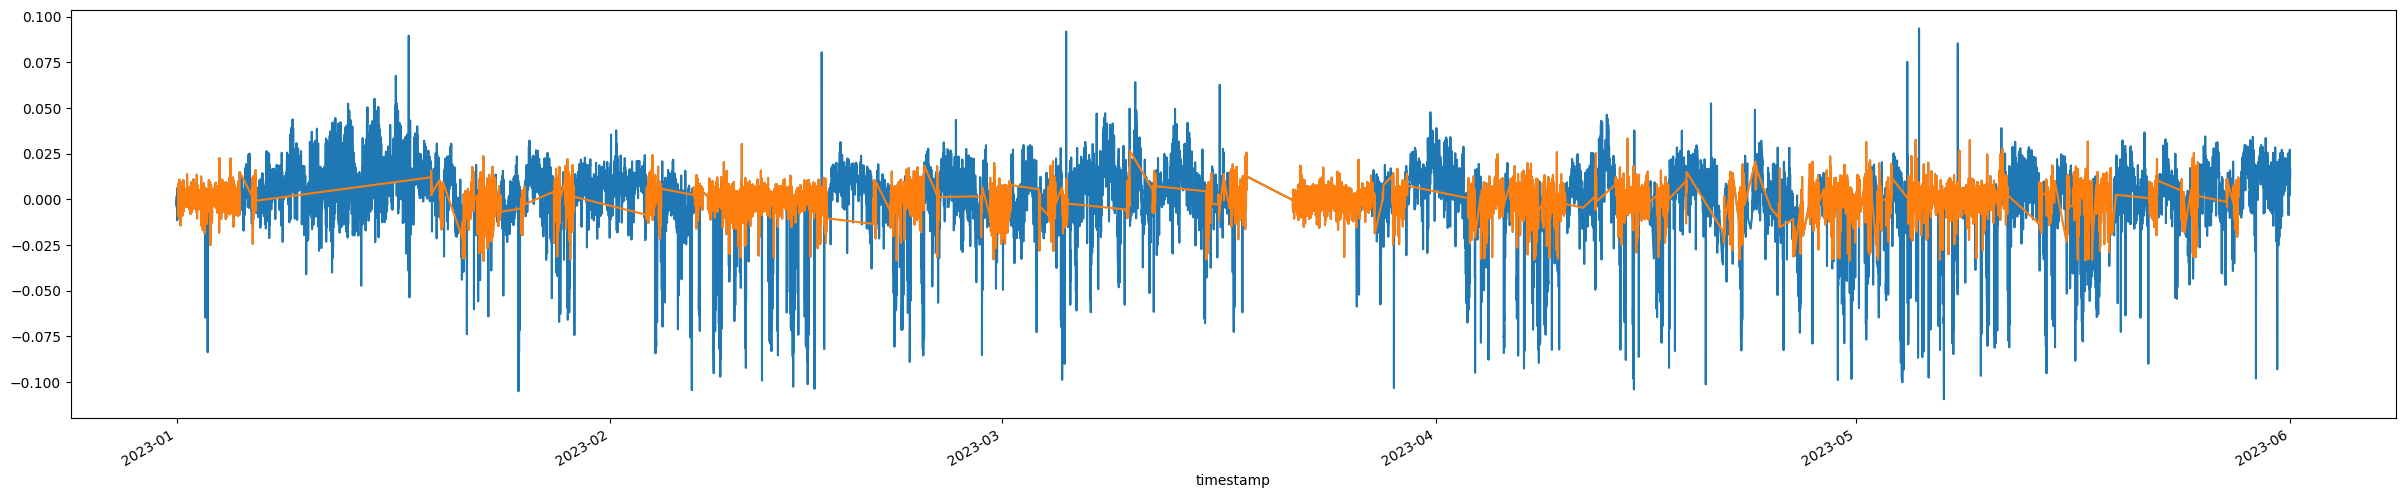

In [15]:
plt.figure(figsize=(30,6))
predictions_df_large_training['residual'].plot()
predictions_df_large_training['residual'].loc[smart_tracked_large_training.index].plot()

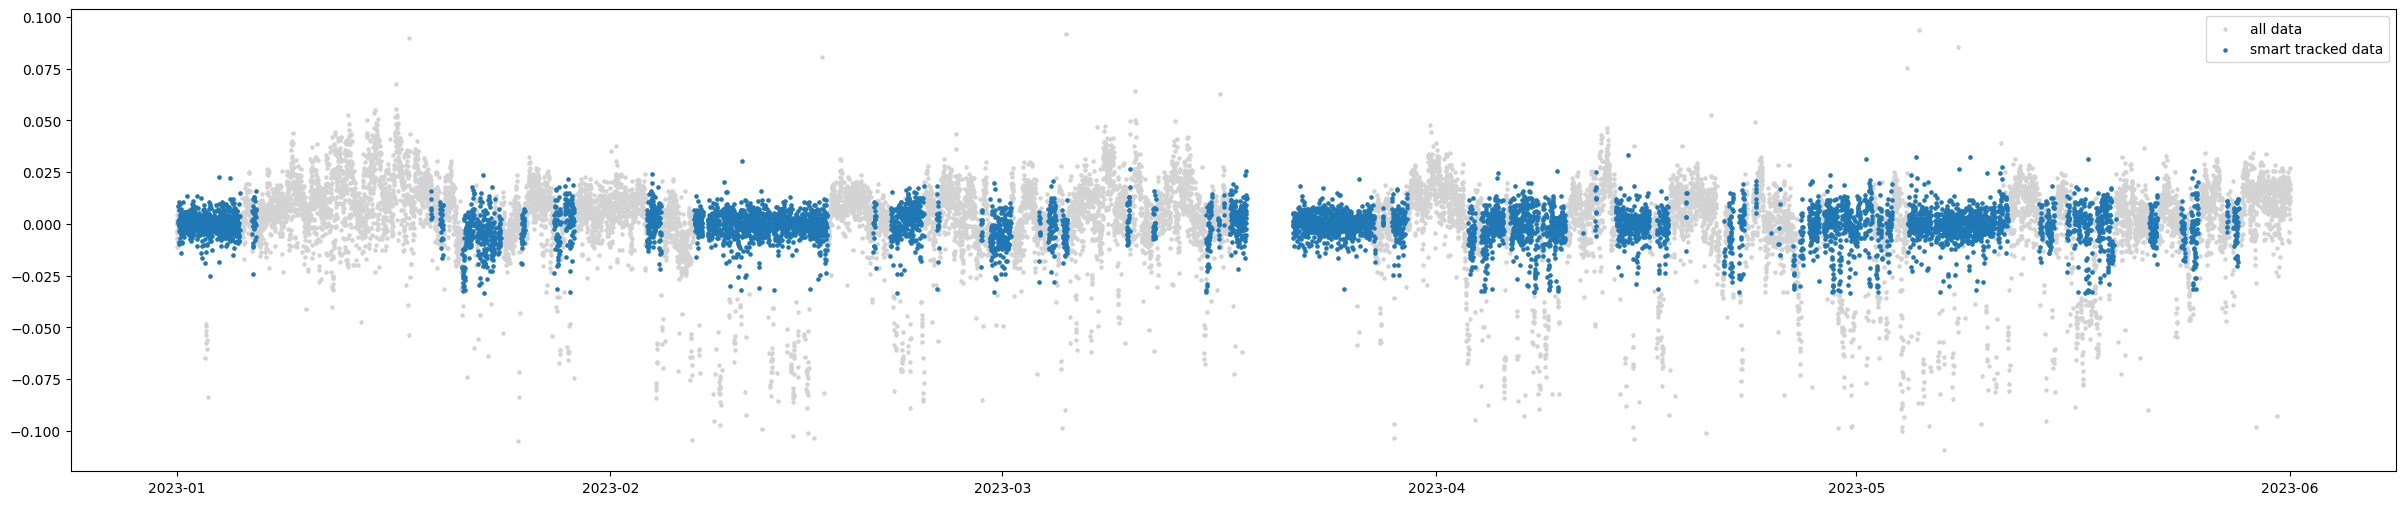

In [20]:
plt.figure(figsize=(30,6))
plt.scatter(predictions_df_large_training.index, predictions_df_large_training['residual'], s=5, color='lightgrey')
plt.scatter(smart_tracked_large_training.index, predictions_df_large_training['residual'].loc[smart_tracked_large_training.index], color='tab:blue', s=5)
plt.legend(['all data', 'smart tracked data'])

plt.show()
plt.close()

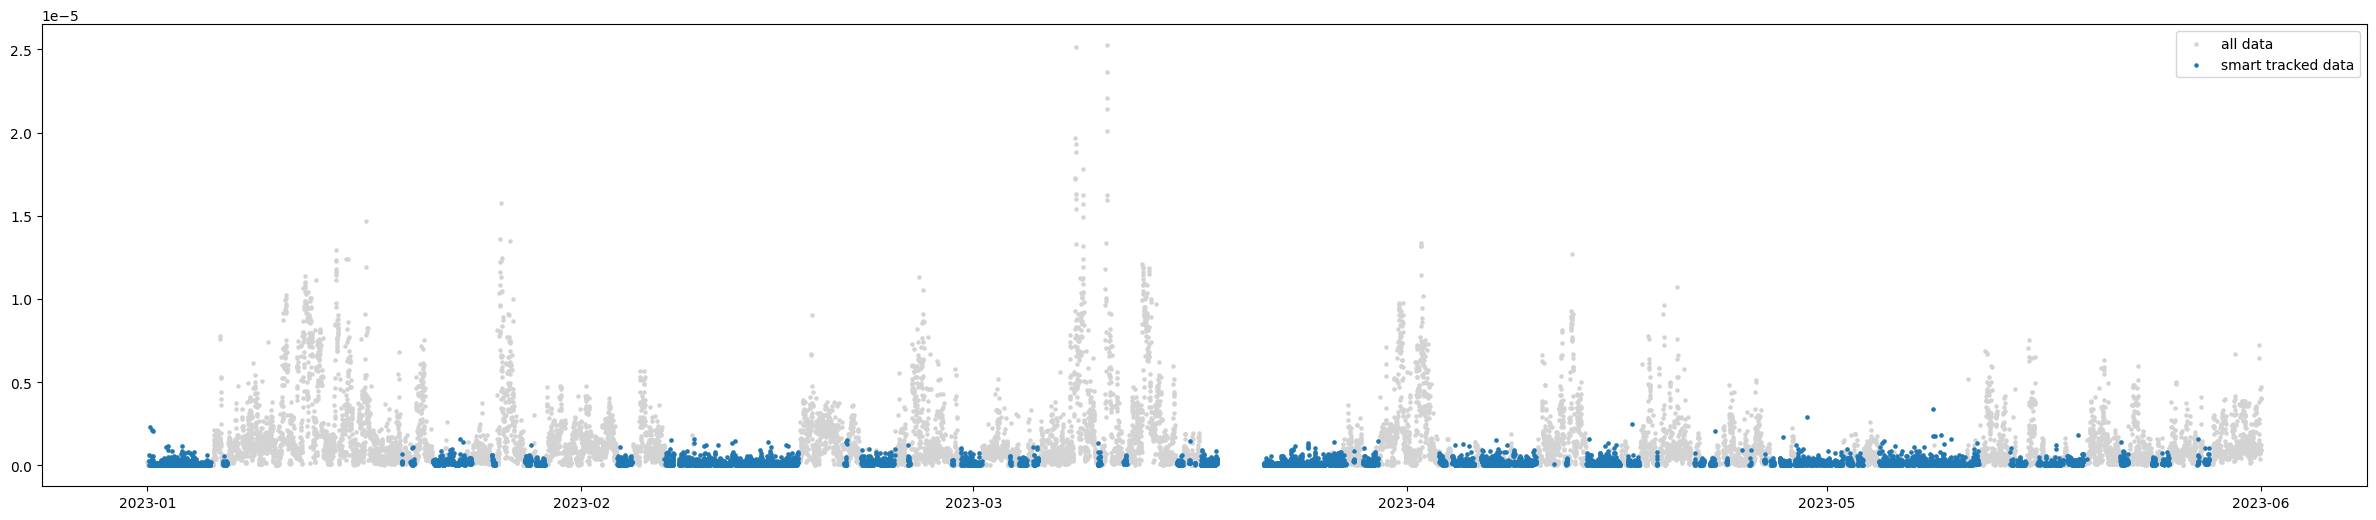

In [19]:
plt.figure(figsize=(30,6))
plt.scatter(predictions_df_large_training.index, predictions_df_large_training['knowledge_uncertainty'], s=5, color='lightgrey')
plt.scatter(smart_tracked_large_training.index, predictions_df_large_training['knowledge_uncertainty'].loc[smart_tracked_large_training.index], color='tab:blue', s=5)
plt.legend(['all data', 'smart tracked data'])
plt.show()
plt.close()